<a href="https://colab.research.google.com/github/HUGOBROWNING/Machine-learning-from-scratch/blob/main/Time_series_forecasting_(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
p = '/content/AEP_hourly.csv'
import pandas as pd
data = pd.read_csv(p)
data.head(6)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
5,2004-12-31 06:00:00,13038.0


In [75]:
data = data.set_index('Datetime')
data.head(3)

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0


<Axes: title={'center': 'Time Series'}, xlabel='Datetime'>

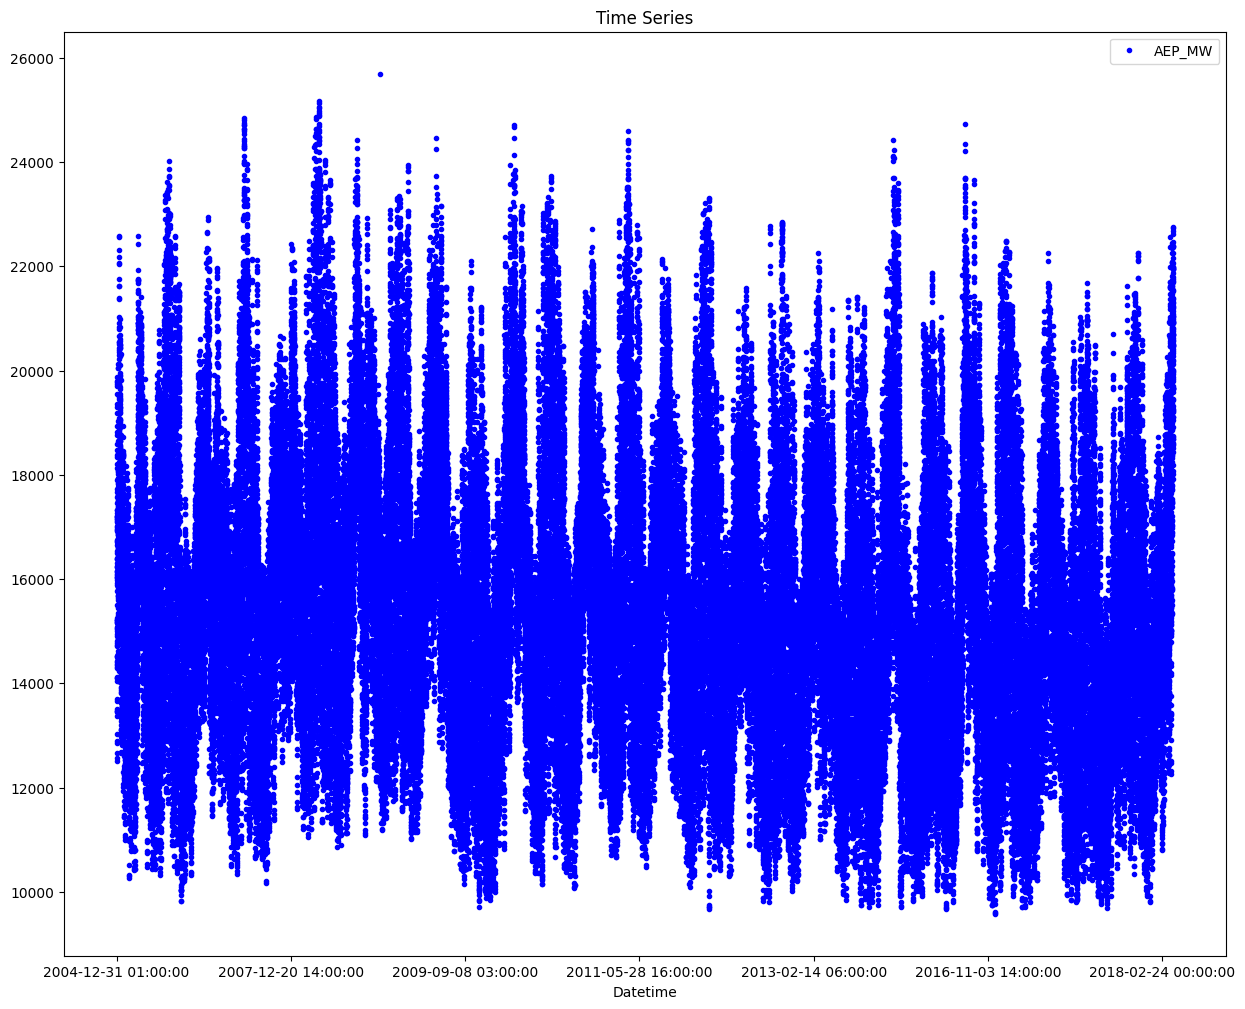

In [76]:
data.plot(style = '.', figsize = (15, 12), color = 'blue', title = 'Time Series')

In [77]:
data.index = pd.to_datetime(data.index)

In [78]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

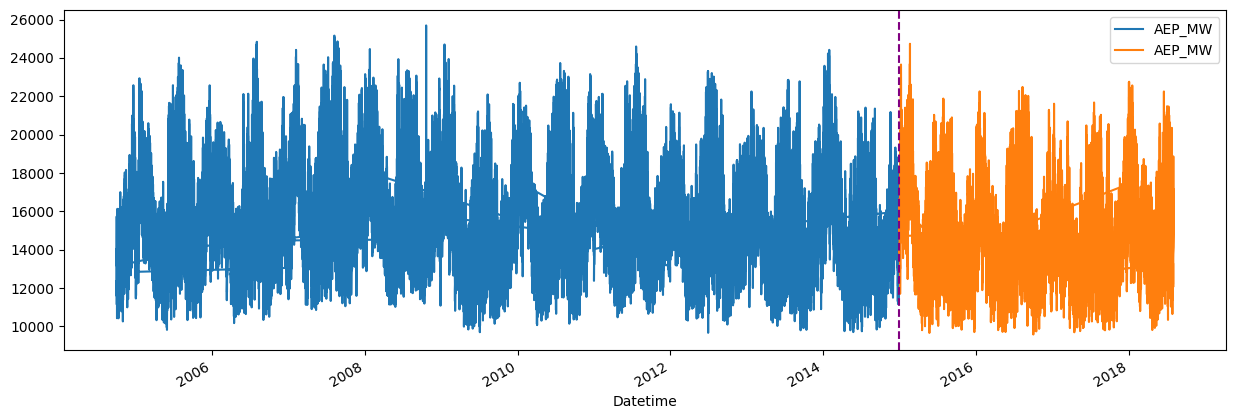

In [79]:
train = data.loc[data.index < '01-01-2015']
test = data.loc[data.index >= '01-01-2015']
fig, axes = plt.subplots(figsize = (15, 5))
train.plot(ax = axes, label = 'Training Set')
test.plot(ax = axes, label = 'Testing Set')
axes.axvline('01-01-2015', color = 'purple', ls = '--')
plt.show()

<Axes: xlabel='Datetime'>

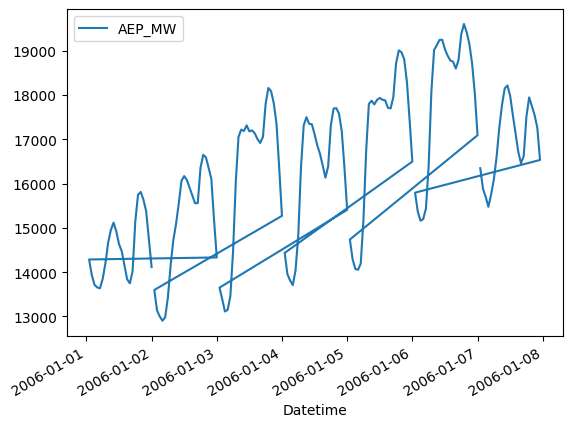

In [80]:
data.loc[(data.index > '01-01-2006') & (data.index < '01-08-2006')].plot()


In [81]:
def create_functions(data):
  data['hour'] = data.index.hour
  data['dayofweek'] = data.index.dayofweek
  data['quarter'] = data.index.quarter
  data['month'] = data.index.month
  data['dayofyear'] = data.index.dayofyear
  return data
data = create_functions(data)

In [82]:
data.head()

,AEP_MW,hour,dayofweek,quarter,month,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,366
2004-12-31 02:00:00,12865.0,2,4,4,12,366
2004-12-31 03:00:00,12577.0,3,4,4,12,366
2004-12-31 04:00:00,12517.0,4,4,4,12,366
2004-12-31 05:00:00,12670.0,5,4,4,12,366


<ipython-input-88-ec0b8cb20c95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = 'month', y = 'AEP_MW', palette = 'coolwarm')


<Axes: xlabel='month', ylabel='AEP_MW'>

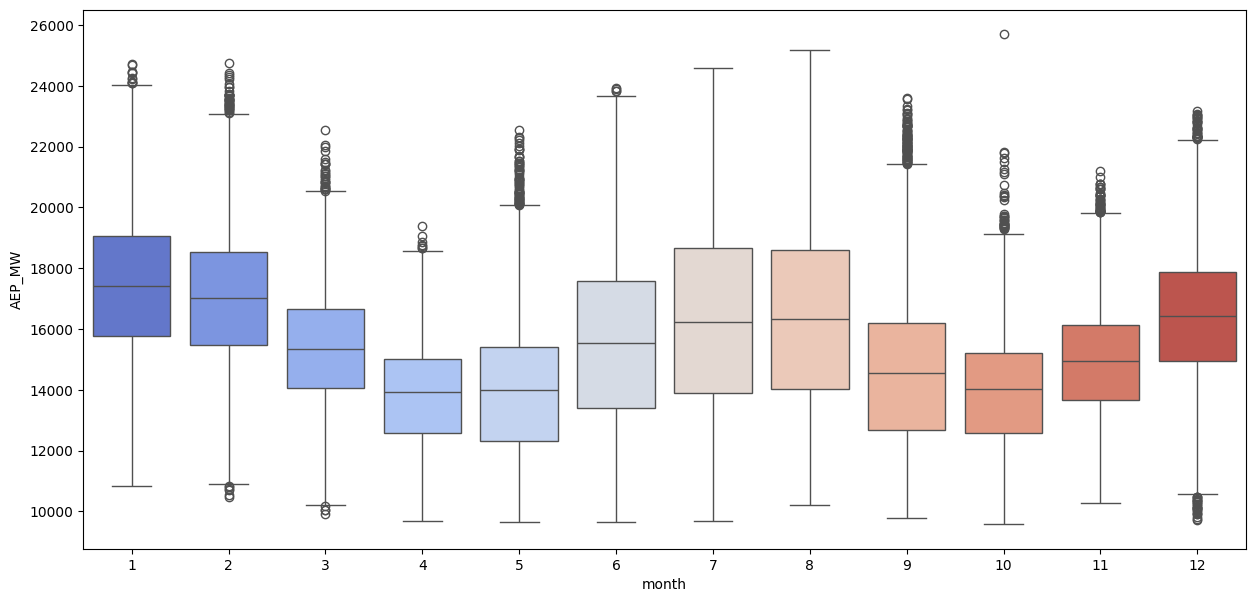

In [88]:
fig, axes = plt.subplots(figsize = (15, 7))
sns.boxplot(data = data, x = 'month', y = 'AEP_MW', palette = 'coolwarm')

In [114]:
from sklearn.metrics import mean_squared_error, r2_score
model = xgb.XGBRegressor(n_estimators = 1000,  early_stopping_rounds = 50, learning_rate =0.01)
train = create_functions(train)
test = create_functions(test)
mylist = data.columns.tolist()

<ipython-input-81-2dc6f2015be8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data.index.hour
<ipython-input-81-2dc6f2015be8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dayofweek'] = data.index.dayofweek
<ipython-input-81-2dc6f2015be8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [106]:
target = 'AEP_MW'
feats= []
for i in mylist:
  if i != target:
    feats.append(i)
feats

['hour', 'dayofweek', 'quarter', 'month', 'dayofyear']

In [115]:
X_train = train[feats]
y_train = train[target]

X_test = test[feats]
y_test = test[target]

model = model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)],verbose = 100)
y_pred = model.predict(X_test)

[0]	validation_0-rmse:2557.15459	validation_1-rmse:2669.95076
[100]	validation_0-rmse:1680.25073	validation_1-rmse:1947.30129
[200]	validation_0-rmse:1459.53464	validation_1-rmse:1814.64832
[300]	validation_0-rmse:1382.65967	validation_1-rmse:1781.48256
[400]	validation_0-rmse:1344.38359	validation_1-rmse:1774.14850
[476]	validation_0-rmse:1325.87493	validation_1-rmse:1774.48297


In [116]:
y_pred

array([15873.006, 15028.6  , 14787.262, ..., 17845.979, 16978.545,
       15284.255], dtype=float32)

In [117]:
round(mean_squared_error(y_test, y_pred), 2), round(r2_score(y_test, y_pred), 2)

(3146550.13, 0.5)

In [120]:
fi = pd.DataFrame(data = model.feature_importances_, index = model.feature_names_in_, columns= ['importance'])

<Axes: >

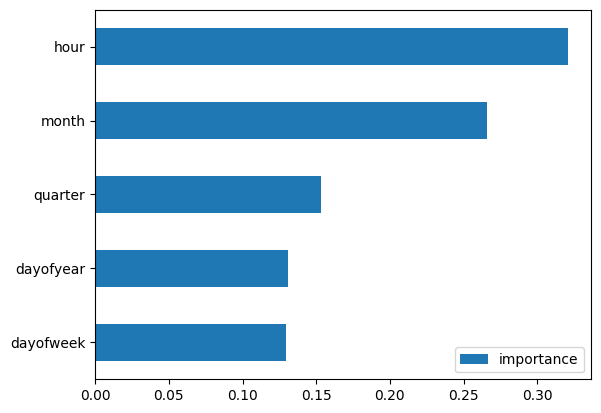

In [123]:
fi.sort_values('importance').plot(kind = 'barh')

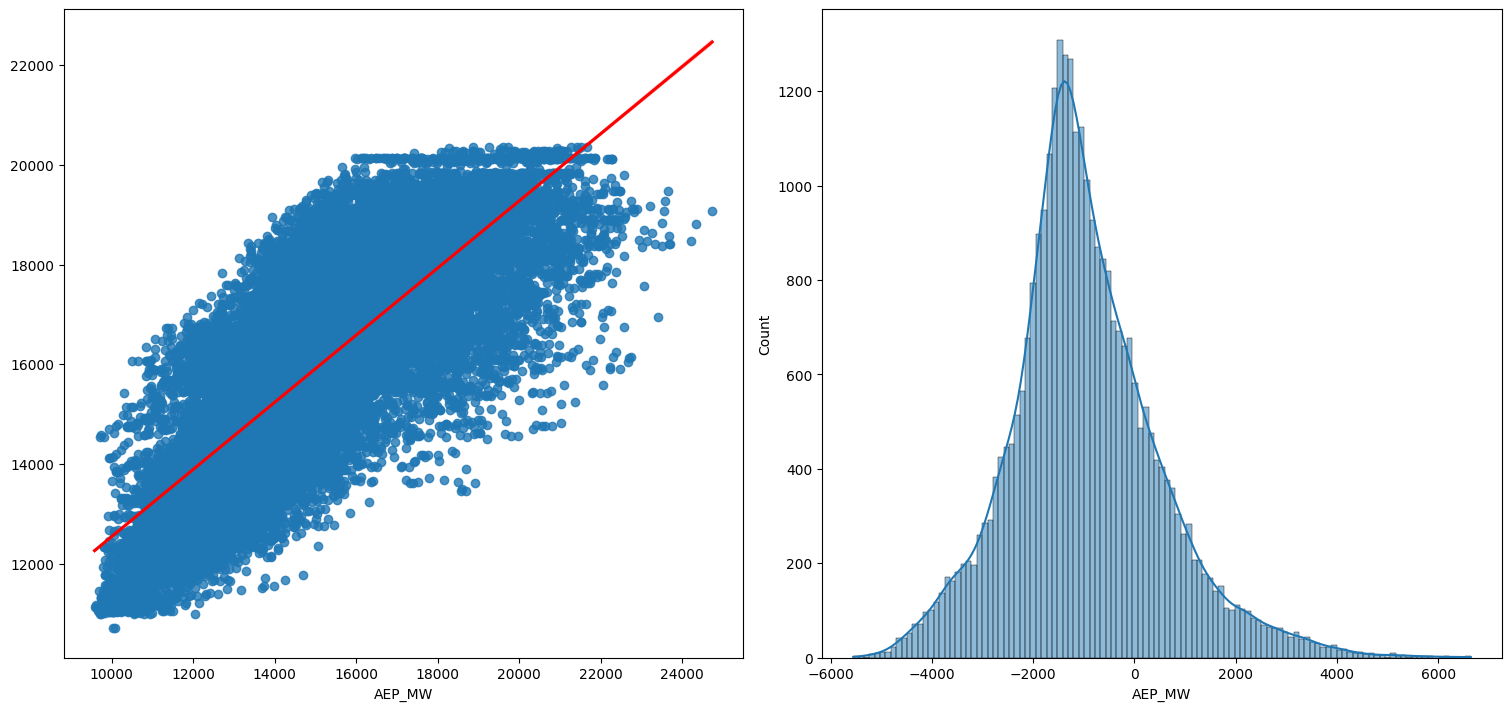

In [125]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7), constrained_layout = True)
axes = axes.flatten()

sns.regplot(x = y_test, y = y_pred, line_kws = {'color': 'red'}, ax = axes[0])
sns.histplot(y_test - y_pred, kde = True, ax = axes[1])
plt.show()